<a href="https://colab.research.google.com/github/iamnileshmehta/Machine-Learning-Projects/blob/main/ML_Project_House_Price_Prediction_using_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/HousePricePrediction.xlsx - Sheet1.csv')
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [ ]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [ ]:
df.shape

(2919, 13)

In [ ]:
obj= (df.dtypes=='object')
object_cols= list(obj[obj].index)
print('Categorical values: ',len(object_cols))

int_= (df.dtypes=='int')
int_cols= list(int_[int_].index)
print('Integer values: ', len(int_cols))

fl= (df.dtypes=='float')
fl_cols= list(fl[fl].index)
print('Float values: ', len(fl_cols))

Categorical values:  4
Integer values:  6
Float values:  3


<ipython-input-8-ffc2f931e984>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='BrBG', fmt='.2f', linewidth= 2, annot=True)


<Axes: >

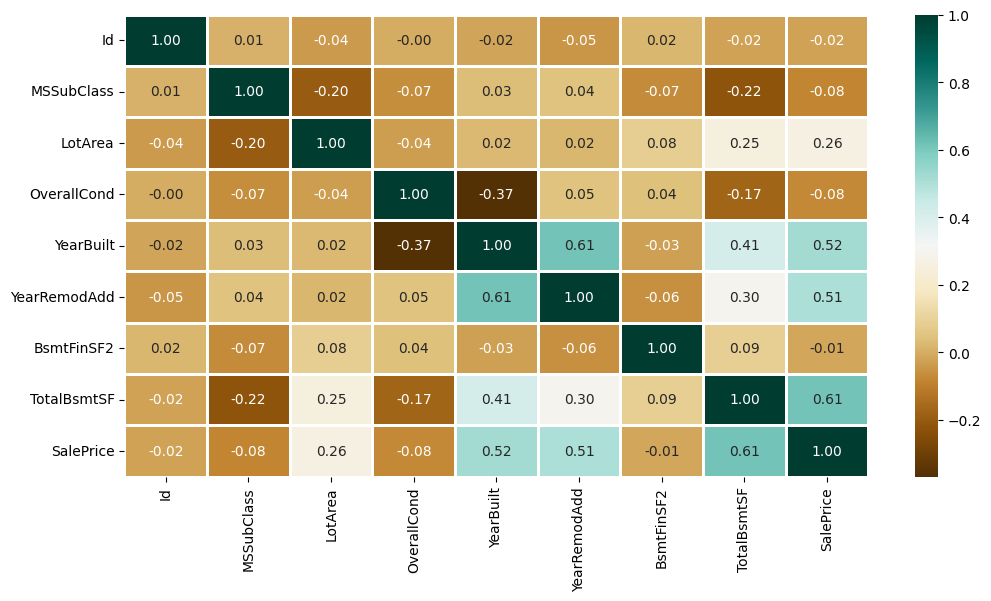

In [ ]:
fig=plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='BrBG', fmt='.2f', linewidth= 2, annot=True)

[6, 5, 5, 16]


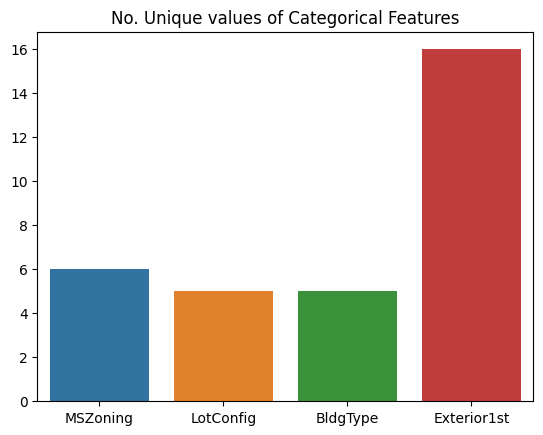

In [ ]:
unique_values=[]
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.title('No. Unique values of Categorical Features')
sns.barplot(x= object_cols, y= unique_values)
print(unique_values)

<ipython-input-10-0a5571f243a9>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11,4,index)


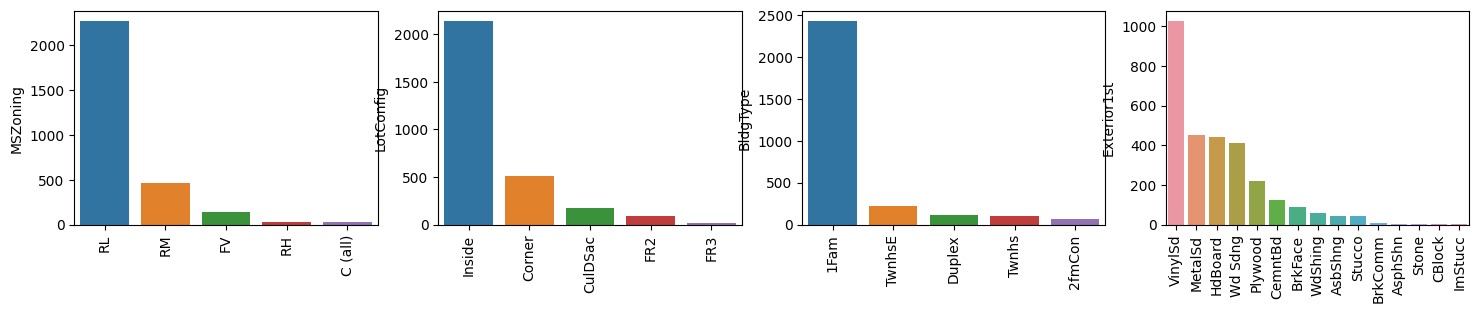

In [ ]:
plt.figure(figsize=(18,36))
plt.title('Categorical features: Distribution')
plt.xticks(rotation=90)
index=1

for col in object_cols:
  y=df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index+=1


In [ ]:
df.drop(['Id'],axis=1, inplace=True)

In [ ]:
df['salePrice']= df['SalePrice'].fillna(df['SalePrice'].mean())

In [ ]:
new_df=df.dropna()

In [ ]:
new_df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
salePrice       0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

s= (new_df.dtypes=='object')
object_cols=list(s[s].index)
print('categorical variables:\n', object_cols)
print('No of categorical features: ', len(object_cols))

categorical variables:
 ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No of categorical features:  4


In [ ]:
OH_encoder= OneHotEncoder(sparse=False)
OH_cols= pd.DataFrame(OH_encoder.fit_transform(new_df[object_cols]))
OH_cols.index= new_df.index
OH_cols.columns=OH_encoder.get_feature_names_out()
df_final= new_df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_final.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,salePrice,MSZoning_C (all),...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,208500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,181500.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,223500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,140000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,250000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X= df_final.drop(['SalePrice'], axis=1)
Y= df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid= train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=0)


In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

# model_SVR= svm.SVR()
# model_SVR.fit(X_train, Y_train)
# Y_pred= model_SVR.predict(X_valid)

# print(mean_absolute_percentage_error(Y_valid, Y_pred))
# print(Y_pred)
# plt.plot(Y_pred)
# plt.show()

0.002333618656920744
[201080.  133000.  109990.  192114.   87800.   85030.  283886.8 141150.
 620726.6 148900.  208930.  136990.  224930.  122930.  118996.4 145000.
 190000.  123700.  149580.  154980.  165790.  144330.4 109950.  174000.
 184975.  168030.  177424.   84300.  318806.1 118530.  109990.8 213440.
 155934.  249858.  376799.  174950.  277250.  112025.  263086.2 326720.
 242200.  129930.  165005.  280367.6 401786.1 118974.8 124930.  128100.
 172618.5  84830.  404791.4 156060.2 168010.  100000.  274994.  122940.
 131975.  240000.  139000.  114851.2 137490.  135000.  134423.2 180390.
 193100.  156772.8 132025.  224730.  139068.7 224940.  188600.  117990.
  82550.  393974.2 111900.  248454.6 134396.4  79050.  320600.  157940.
 140000.  136421.  107350.  145000.  200140.  184980.  104930.  202740.
 185815.  135825.  200038.2 189995.  187320.  199970.  172617.  157000.
 213340.  184975.  124500.  162990.  260260.  198670.  120000.  159421.8
 106150.  259940.  142950.  106350.  17886

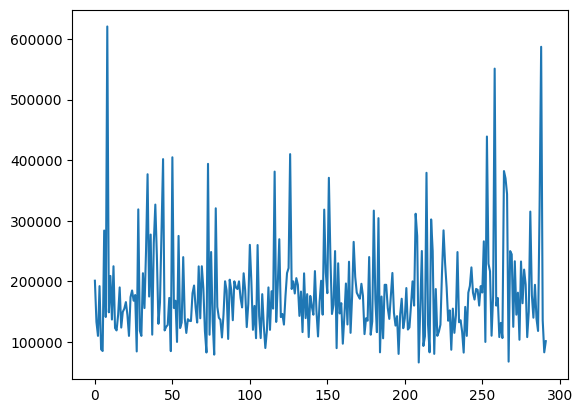

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))
print(Y_pred)
plt.plot(Y_pred)
plt.show()

5.384924221884655e-16
[200624. 133000. 110000. 192000.  88000.  85000. 282922. 141000. 745000.
 148800. 208900. 136905. 225000. 123000. 119200. 145000. 190000. 123600.
 149350. 155000. 166000. 144500. 110000. 174000. 185000. 168000. 177500.
  84500. 320000. 118500. 110000. 213000. 156000. 250000. 372500. 175000.
 277500. 112500. 263000. 325000. 243000. 130000. 164990. 280000. 403000.
 119000. 125000. 128200. 172500.  84900. 412500. 156000. 167900. 100000.
 275000. 123000. 132000. 239900. 139000. 115000. 137500. 135000. 134450.
 180500. 193500. 156500. 132000. 224500. 139000. 225000. 188500. 118000.
  82000. 392000. 112000. 248900. 134500.  79500. 320000. 158000. 140000.
 136500. 107500. 145000. 200500. 185000. 105000. 202665. 186000. 136000.
 200500. 190000. 187500. 200000. 172500. 157000. 213000. 185000. 124500.
 162900. 260000. 198500. 120000. 159500. 105900. 260000. 143000. 106500.
 178900. 127000.  90350. 118500. 190000. 119900. 183900. 155000. 386250.
 133000. 193500. 270000. 1410

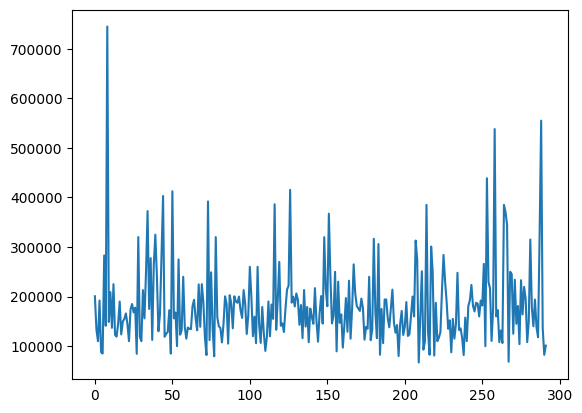

In [ ]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))
print(Y_pred)
plt.plot(Y_pred)
plt.show()

In [ ]:
df1=pd.DataFrame(Y_pred)
df1

,0
0,200624.0
1,133000.0
2,110000.0
3,192000.0
4,88000.0
...,...
287,324000.0
288,555000.0
289,136000.0
290,82500.0


In [ ]:
df1.describe()

,0
count,292.000000
mean,181370.383562
std,83244.107342
min,67000.000000
25%,128875.000000
50%,163950.000000
75%,203573.750000
max,745000.000000
